# Imports

In [1]:
#writetofile = "../tmp-output/"
writetofile = None

import matplotlib
if writetofile:
    matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "lualatex",
        'font.family': 'serif',
        "font.serif": ['Computer Modern Roman'],
        "font.sans-serif": ['Computer Modern Sans Serif'],
        "font.monospace": ['Computer Modern Typewriter'],
        'text.usetex': True,
        'pgf.rcfonts': False
    })
matplotlib.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'



import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.animation import FuncAnimation
from IPython import display
import numpy as np
import pandas as pd
import seaborn as sns
import os
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')  # Use '' for auto, or force e.g. to 'en_US.UTF-8'

sns.set_theme(style='darkgrid', font="serif", rc={
    'legend.frameon':True,
})

def plt_show(outputname="output.pgf", w=2.25, h=2.25):
    if writetofile:
        fname = os.path.join(writetofile, outputname)
        plt.gcf().set_size_inches(w=w, h=h)
        plt.savefig(fname, bbox_inches="tight")
        print("Output printed to " + fname)
    else:
        plt.show()
    plt.figure().clear()
    plt.close()
    plt.cla()
    plt.clf()

## Read data files

In [3]:
print("Reading hqcdata...")
hqctimingdataraw = pd.read_csv("../data/hqc-leander/compat_timings.csv")
print("Filtering hqcdata")
hqctimingdata = hqctimingdataraw.set_index("key")
hqctimingdata = hqctimingdata[~((hqctimingdata["Num. PRNG Samplings $\\theta$"] == 231) & (hqctimingdata["Num. Seedexpansions"] == 1))]
hqctimingdata = hqctimingdata[~((hqctimingdata["Num. PRNG Samplings $\\theta$"] == 233) & (hqctimingdata["Num. Seedexpansions"] == 3))]
hqctimingdata

Reading hqcdata...
Filtering hqcdata


,Algorithm,Num. Seedexpansions,Num. PRNG Samplings $\theta$,Clock cycles
key,,,,
0,HQC-128,2,227,634587
1,HQC-128,0,225,549524
2,HQC-128,0,225,542309
3,HQC-128,0,225,673918
4,HQC-128,1,226,608761
...,...,...,...,...
9999995,HQC-128,1,226,257927
9999996,HQC-128,0,225,256336
9999997,HQC-128,1,228,258149


In [ ]:

#print("Reading hqcdata...")
#hqcdata = pd.read_csv("../data/compressed/hqc-128-timings.csv.gz")
#print("filtering hqcdata...")
#hqcdata = hqcdata[hqcdata["iterations"] >= 10]
print("Reading bikedata...")
bikedata = pd.read_csv("../data/compressed/bike-l1/bike-l1-timings-1000000.csv.gz")

print("Filtering out bikedata...")
bikedata.columns = ["Algorithm", "Num. Seedexpansions", "Num. PRNG Samplings $\\theta$", "Clock cycles"]
bikedata = bikedata[(bikedata["Num. PRNG Samplings $\\theta$"] >= 140) & (bikedata["Num. PRNG Samplings $\\theta$"] <= 242)]
#bikedata["Num. Seedexpansions"] = pd.to_numeric(bikedata["Num. Seedexpansions"], errors='coerce')
bikedata.reset_index(inplace=True, drop=True)

if False:
    print("Reading bike patch data...")
    patchdata = pd.read_csv("../data/compressed/bike-l1/bike-l1-timings-1000000--244-245-246-247.csv.gz")
    patchdata.columns = ["Algorithm", "Num. Seedexpansions", "Num. PRNG Samplings $\\theta$", "Clock cycles"]
    patchdata_iters = patchdata["Num. PRNG Samplings $\\theta$"].unique()
    # remove data that matches patchdata
    print("Removing old bike patch data...")
    bikedata = bikedata[~bikedata["Num. PRNG Samplings $\\theta$"].isin(patchdata_iters)]
    print("Adding new patch data...")
    bikedata = pd.concat([bikedata, patchdata])

bikedata

# HQC/BIKE Timings

In [23]:
for data in [hqctimingdata]: #bikedata]:
    dataalg = data["Algorithm"][0]
    print("dataalg: " + dataalg)
    g = sns.catplot(
        data=data,#[data["Clock cycles"] < 2800000],
        orient="v",
        x="Num. PRNG Samplings $\\theta$",
        y="Clock cycles",
        hue="Num. Seedexpansions",
        dodge=dataalg != "BikeL1",
        kind="box",
        showfliers=False,
        sharex=True,
        sharey=True,
        # k_depth="proportion",
        # outlier_prop=0.2,
        palette="colorblind",
        linewidth=0.01,
        aspect=1,
        height=10,
        #whis=[0.01,0.99]
    )
    for axes in g.axes.flat:
        xticks = axes.get_xticklabels()
        if dataalg == "BikeL1":
            for xtick in xticks:
                label = int(xtick.get_text())
                if label % 4 != 1: # the first tick in a new seedexpansion
                    xtick.set_text("")
        axes.set_xticklabels(xticks, rotation=60)
        axes.ticklabel_format(axis="y", scilimits=[-1, 1])
        axes.set(xlabel="Num. PRNG Samplings")
    sns.move_legend(g, loc="upper center", bbox_to_anchor=(0.485, 0.97), ncol=6, fontsize="x-small", frameon=True, borderpad=0.5, labelspacing=0.25, columnspacing=1.0)
    #anc = AnchoredText(f'{alg}', loc="upper center", frameon=False)
    #g.axes[0,0].add_artist(anc)
    if dataalg == "BikeL1":
        w = 5.37502
        h = 3
    else:
        w = 3
        h = 2
    plt_show("{}-timings.pgf".format(dataalg), w=w, h=h)


dataalg: HQC-128
Output printed to ../tmp-output/HQC-128-timings.pgf


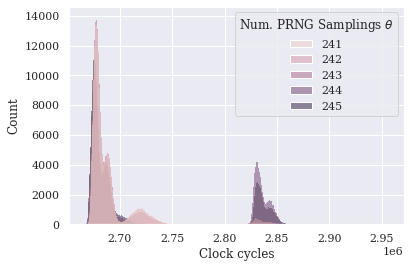

<Figure size 432x288 with 0 Axes>

In [15]:
i244 = data[(data["Num. PRNG Samplings $\\theta$"] > 240) & (data["Num. PRNG Samplings $\\theta$"] <= 246)]
i244 = i244[i244["Clock cycles"] <= 3000000]
sns.histplot(data=i244, x="Clock cycles", hue="Num. PRNG Samplings $\\theta$")
plt_show("i244.pgf")

### HQC data from Leander

In [9]:
#["Algorithm", "Num. Seedexpansions", "Num. PRNG Samplings $\\theta$", "Clock cycles"] + ["Num. Plaintexts"]
hqchistdata = hqctimingdataraw[["Num. Seedexpansions", "Clock cycles"]].groupby(["Num. Seedexpansions"]).count().reset_index(drop=False)
hqchistdata.columns = ["Num. Seedexpansions", "Num. Plaintexts"]
hqchistdata

,Num. Seedexpansions,Num. Plaintexts
0,0,5504377
1,1,3637084
2,2,799783
3,3,58756


In [5]:

bikehistdata = [
#[35,138,1],
#[35,139,9],
[35,140,38],
[36,141,162],
[36,142,802],
[36,143,2839],
[36,144,10563],
[37,145,34424],
[37,146,104103],
[37,147,291491],
[37,148,765680],
[38,149,1888311],
[38,150,4392169],
[38,151,9682582],
[38,152,20300457],
[39,153,40581803],
[39,154,77575004],
[39,155,142145846],
[39,156,250255003],
[40,157,424213861],
[40,158,693414743],
[40,159,1095205861],
[40,160,1673625091],
[41,161,2478452739],
[41,162,3561295650],
[41,163,4971442063],
[41,164,6749961845],
[42,165,8923760740],
[42,166,11498337998],
[42,167,14454129957],
[42,168,17741006831],
[43,169,21280189138],
[43,170,24964453190],
[43,171,28663354931],
[43,172,32232436960],
[44,173,35523694068],
[44,174,38393584471],
[44,175,40717618086],
[44,176,42396466535],
[45,177,43364110541],
[45,178,43592191467],
[45,179,43089501005],
[45,180,41901555125],
[46,181,40101226257],
[46,182,37787996178],
[46,183,35073861477],
[46,184,32079622703],
[47,185,28922228409],
[47,186,25713157913],
[47,187,22550517370],
[47,188,19514676526],
[48,189,16669015393],
[48,190,14058764123],
[48,191,11710718520],
[48,192,9637236005],
[49,193,7837148005],
[49,194,6299774194],
[49,195,5006618510],
[49,196,3935031333],
[50,197,3059284504],
[50,198,2353274929],
[50,199,1791334463],
[50,200,1349740982],
[51,201,1006813057],
[51,202,743708444],
[51,203,544064129],
[51,204,394323251],
[52,205,283088783],
[52,206,201432340],
[52,207,142049089],
[52,208,99298182],
[53,209,68811128],
[53,210,47288715],
[53,211,32222709],
[53,212,21786627],
[54,213,14612471],
[54,214,9726257],
[54,215,6421062],
[54,216,4205677],
[55,217,2734006],
[55,218,1767204],
[55,219,1131071],
[55,220,720350],
[56,221,454602],
[56,222,286302],
[56,223,176943],
[56,224,110118],
[57,225,67036],
[57,226,41538],
[57,227,25143],
[57,228,15162],
[58,229,9034],
[58,230,5381],
[58,231,3269],
[58,232,1873],
[59,233,1123],
[59,234,651],
[59,235,385],
[59,236,186],
[60,237,144],
[60,238,67],
[60,239,46],
[60,240,22],
[61,241,10],
[61,242,10],
#[61,243,4],
#[61,244,1],
#[62,245,1],
#[62,247,1],
]

hqchistdata = pd.DataFrame(hqchistdata, columns=["Num. Seedexpansions", "Num. PRNG Samplings $\\theta$", "Num. Plaintexts"])

bikehistdata = pd.DataFrame(bikehistdata, columns=["Num. Seedexpansions", "Num. PRNG Samplings $\\theta$", "Num. Plaintexts"])

bikehistsum = bikehistdata['Num. Plaintexts'].sum()
bikehistsubfracbelow = 160
bikehistsubfrac = bikehistdata[bikehistdata["Num. PRNG Samplings $\\theta$"] <= bikehistsubfracbelow]['Num. Plaintexts'].sum() / bikehistsum
bikehisttopfracabove = 200
bikehisttopfrac = bikehistdata[bikehistdata["Num. PRNG Samplings $\\theta$"] >= bikehisttopfracabove]['Num. Plaintexts'].sum() / bikehistsum
# mean = np.average(mids, weights=n)
bikehistmean = np.average(bikehistdata["Num. PRNG Samplings $\\theta$"], weights=bikehistdata["Num. Plaintexts"])
# var = np.average((mids - mean)**2, weights=n)
bikehistvar = np.average((bikehistdata["Num. PRNG Samplings $\\theta$"] - bikehistmean)**2, weights=bikehistdata["Num. Plaintexts"])
# std = np.sqrt(var)
bikehiststd = np.sqrt(bikehistvar)

print("Sum: " + str(bikehistsum))
print("average: " + str(bikehistmean))
print("Variance: " + str(bikehistvar))
print("Std deviation: " + str(bikehiststd))
print("Fraction below {} (span {}): {}".format(bikehistsubfracbelow, bikehistsubfracbelow - bikehistdata["Num. PRNG Samplings $\\theta$"].min(), bikehistsubfrac))
print("Fraction above {} (span {}): {}".format(bikehisttopfracabove, bikehistdata["Num. PRNG Samplings $\\theta$"].max() - bikehisttopfracabove, bikehisttopfrac))

bikehistdata, hqchistdata

Sum: 840010665564
average: 178.64167951360724
Variance: 59.514328773464236
Std deviation: 7.714553050790709
Fraction below 160 (span 20): 0.005279088724453985
Fraction above 200 (span 42): 0.005925096886309468


(     Num. Seedexpansions  Num. PRNG Samplings $\theta$  Num. Plaintexts
 0                     35                           140               38
 1                     36                           141              162
 2                     36                           142              802
 3                     36                           143             2839
 4                     36                           144            10563
 ..                   ...                           ...              ...
 98                    60                           238               67
 99                    60                           239               46
 100                   60                           240               22
 101                   61                           241               10
 102                   61                           242               10
 
 [103 rows x 3 columns],
     Num. Seedexpansions  Num. PRNG Samplings $\theta$  Num. Plaintexts
 0                     0 

In [6]:
for (dataalg, histdata) in [("bike", bikehistdata)]:
    print("dataalg: " + dataalg)
    g = sns.catplot(
        data=histdata,
        order=range(histdata['Num. PRNG Samplings $\\theta$'].min(),histdata['Num. PRNG Samplings $\\theta$'].max()+1),
        x="Num. PRNG Samplings $\\theta$",
        hue="Num. Seedexpansions",
        y="Num. Plaintexts",
        kind="bar",
        palette="colorblind",
        linewidth=0,
        dodge= (dataalg != "bike"),
        height=8
    )
    g.ax.set_yscale('log')

    for axes in g.axes.flat:
        xticks = axes.get_xticklabels()
        if dataalg == "bike":
            for xtick in xticks:
                label = int(xtick.get_text())
                if label % 4 != 1: # the first tick in a new seedexpansion
                    xtick.set_text("")
        axes.set_xticklabels(xticks, rotation=60)
    if dataalg == "bike":
        loc = "center"
        bbox_to_anchor=(0.45, 0.5)
    else:
        loc="upper center"
        bbox_to_anchor=(0.45, 0.97)
    sns.move_legend(g, loc=loc, bbox_to_anchor=bbox_to_anchor, ncol=6, fontsize="x-small", frameon=True, borderpad=0.5, labelspacing=0.25, columnspacing=1.0)
    #anc = AnchoredText(f'{alg}', loc="upper center", frameon=False)
    #g.axes[0,0].add_artist(anc)
    plt_show("{}-iter-hist.pgf".format(dataalg), w=5.37502, h=3)

dataalg: hqc
Output printed to ../tmp-output/hqc-iter-hist.pgf
dataalg: bike
Output printed to ../tmp-output/bike-iter-hist.pgf


In [22]:
for (dataalg, histdata) in [("hqc", hqchistdata)]:
    print("dataalg: " + dataalg)
    g = sns.catplot(
        data=histdata,
        #order=range(histdata['Num. PRNG Samplings $\\theta$'].min(),histdata['Num. PRNG Samplings $\\theta$'].max()+1),
        x="Num. Seedexpansions",
        hue="Num. Seedexpansions",
        y="Num. Plaintexts",
        kind="bar",
        palette="colorblind",
        linewidth=0,
        dodge=False,
        height=8,
        legend=True
    )
    #g.ax.set_yscale('log')

    for axes in g.axes.flat:
        xticks = axes.get_xticklabels()
        axes.set_xticklabels(xticks, rotation=60)
    loc="upper center"
    bbox_to_anchor=(0.45, 0.97)
    #sns.move_legend(g, loc=loc, bbox_to_anchor=bbox_to_anchor, ncol=6, fontsize="x-small", frameon=True, borderpad=0.5, labelspacing=0.25, columnspacing=1.0)
    #anc = AnchoredText(f'{alg}', loc="upper center", frameon=False)
    #g.axes[0,0].add_artist(anc)
    plt_show("{}-iter-hist.pgf".format(dataalg), w=2.25, h=2)

dataalg: hqc
Output printed to ../tmp-output/hqc-iter-hist.pgf


# BIKE Timings

## BIKE KEY ##

## BIKE Experiment

In [3]:
bikefacit = pd.read_csv("../data/compressed/bike-l1/kem-l1.keypair.ds")[["distance", "count"]]
#bikefacit = bikefacit[bikefacit["distance"] != 0]
#bikefacit = pd.concat([bikefacit]*4, ignore_index=True) # once per list
bikefacit.columns = ["distance", "Multip."]
bikefacit

,distance,Multip.
0,0,0
1,1,1
2,2,1
3,3,0
4,4,1
...,...,...
6158,6158,0
6159,6159,0
6160,6160,0
6161,6161,0


In [25]:
#path_fmt = "../data/compressed/bike-l1/kem-l1-hw149-100000-{}.csv.gz"
path_fmt = "../data/compressed/bike-l1/kem-l1-hw149-100000-ep0.01-{:02d}.csv.gz"
#path_fmt = "../bike-l1-2021-12-12.csv.gz"

def read_csv(idx):
    f = path_fmt.format(idx)
    #print(f"reading {f}")
    df = pd.read_csv(f)
    #df = df[df["list"] == "a"]
    df["dataset"] = idx
    df = df.merge(bikefacit, on="distance")
    # Remove the zeroth distance
    df = df[df["distance"] != 0]
    return df

bikedata = read_csv(0)
for i in range(1, 20):
    try:
        bikedata = pd.concat([bikedata, read_csv(i)])
    except:
        print(f"Stopped reading files at index: {i}")
        break

bikedata

,list,distance,count,dataset,Multip.
4,f,1,2391,0,1
5,g,1,2395,0,1
6,a,1,16144,0,1
7,b,1,15465,0,1
8,f,2,2403,0,1
...,...,...,...,...,...
24643,b,6160,16031,19,0
24644,f,6161,2425,19,0
24645,g,6161,2434,19,0
24646,a,6161,16631,19,0


In [26]:
aggbikedata = bikedata[bikedata["list"].isin(["f","g"])].groupby(["distance", "Multip."], as_index=False).sum()
aggbikedata

,distance,Multip.,count,dataset
0,1,1,95181,380
1,2,1,94989,380
2,3,0,96371,380
3,4,1,94608,380
4,5,1,95187,380
...,...,...,...,...
6156,6157,1,95164,380
6157,6158,0,96208,380
6158,6159,0,96825,380
6159,6160,0,96667,380


In [27]:
cumulativebikedata = bikedata[bikedata["list"].isin(["f","g"])].groupby(["distance", "Multip.", "dataset"], as_index=False).sum()
cumulativebikedata["count"] = cumulativebikedata.groupby(["distance", "Multip."], as_index=False)["count"].cumsum()
cumulativebikedata[cumulativebikedata["dataset"] == 10]

,distance,Multip.,dataset,count
10,1,1,10,52143
30,2,1,10,51956
50,3,0,10,52898
70,4,1,10,52144
90,5,1,10,52702
...,...,...,...,...
123130,6157,1,10,52187
123150,6158,0,10,53025
123170,6159,0,10,53085
123190,6160,0,10,53179


### Try make a video (unsuccessfull)

In [28]:
if False: 
    fig, ax = plt.subplots()


    def animate(frame_num):
        print(f"Working on frame {frame_num}")
        df = cumulativebikedata[cumulativebikedata["dataset"] == frame_num]
        axis = sns.scatterplot(
            data=cumulativebikedata,
            x="distance",
            y="count",
            hue="Multip.",
            style="Multip.",
            edgecolor=None,
            s=1,
            palette="colorblind",
        )
        axis.set(
            xlabel="Distance",
            ylabel="Num. Occurences",
        )
        axis.ticklabel_format(axis="y", scilimits=[-1, 1])
        sns.move_legend(axis, "lower right", fontsize="x-small")


    print(f"Making animation")
    anim = FuncAnimation(
        fig, animate, frames=cumulativebikedata["dataset"].max(), interval=1000
    )
    print(f"Making video")
    video = anim.to_html5_video()
    with open("../tmp-output/myvideo.html", "w") as f:
        print(f"writing video")
        print(video, file=f)
    print(f"Making html")
    html = display.HTML(video)
    print(f"displaying html")
    display.display(html)
    plt.close()


### Scatterplot and histogram

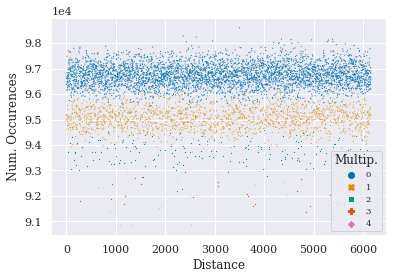

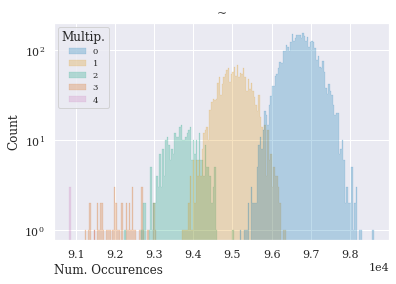

<Figure size 432x288 with 0 Axes>

In [29]:

axis = sns.scatterplot(data=aggbikedata, x="distance", y="count", hue="Multip.", style="Multip.", edgecolor=None, s=1, palette="colorblind")
axis.set(
   xlabel="Distance",
   ylabel="Num. Occurences",
)
axis.ticklabel_format(axis="y", scilimits=[-1, 1])
sns.move_legend(axis, "lower right", fontsize="x-small")
plt_show("bike-distance-spectrum.pgf", w=2.25)

axis = sns.histplot(data=aggbikedata, x="count", hue="Multip.", log_scale=(False, True), bins=200, element="step", linewidth=0.1, palette="colorblind", legend=True)
axis.set_xlabel("Num. Occurences", loc="left")
axis.set_ylabel("Count")
axis.set_title("~")
axis.ticklabel_format(axis="x", scilimits=[-1, 1])
sns.move_legend(axis, "upper left", fontsize="x-small")
plt_show("bike-distance-histogram.pgf", w=2.25)

#bikedata

## Show seperate lists F, G, A, B

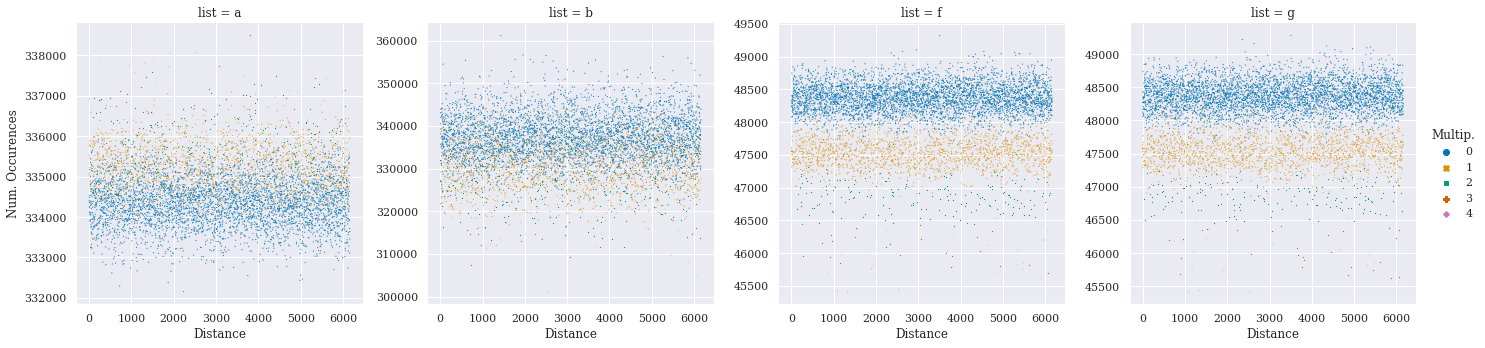

<Figure size 432x288 with 0 Axes>

In [30]:
summbikedata = bikedata.groupby(["distance", "list", "Multip."], as_index=False).sum()
g = sns.relplot(data=summbikedata, kind="scatter", x="distance", y="count", col="list", hue="Multip.", style="Multip.", edgecolor=None, s=1, palette="colorblind", facet_kws={'sharey': False, 'sharex': True})
g.set_xlabels("Distance")
g.set_ylabels("Num. Occurences")
plt_show("bike-distance-spectrum-fgab.pgf", w=6)


# Misc

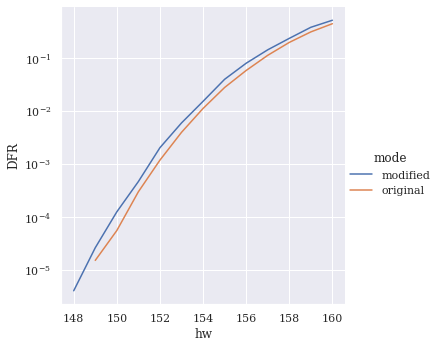

<Figure size 432x288 with 0 Axes>

In [31]:
DFRs = pd.DataFrame([
    [160,"modified",0.516935],
    [160,"original",0.444731],
    [159,"modified",0.380486],
    [159,"original",0.311354],
    [158,"modified",0.234947],
    [158,"original",0.196979],
    [157,"modified",0.142818],
    [157,"original",0.112376],
    [156,"modified",0.07967],
    [156,"original",0.058147],
    [155,"modified",0.039576],
    [155,"original",0.027723],
    [154,"modified",0.015183],
    [154,"original",0.011139],
    [153,"modified",0.005926],
    [153,"original",0.003938],
    [152,"modified",0.00202],
    [152,"original",0.001176],
    [151,"modified",0.000463],
    [151,"original",0.000297],
    [150,"modified",0.000124],
    [150,"original",5.5E-05],
    [149,"modified",2.6E-05],
    [149,"original",1.5E-05],
    [148,"modified",4E-06],
    #[148,"original",0],
], columns=["hw", "mode", "DFR"])

g = sns.relplot(data=DFRs, x="hw", y="DFR", hue="mode", kind="line")
g.set(yscale="log")
plt_show("bike-dfrs.pgf", w=2.25)
